<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Revenue & COGS by Segment Dashboard 

**Tags:** #dashboard #plotly #dash #naas #asset #automation #ai #analytics

**Author:** [Fernando Chavez Osuna](https://www.linkedin.com/in/fernando-chavez-osuna-1a420a181)

This notebook enables you to generate a dashboard about Revenue & COGS by segment.

## Input

### Install packages

In [3]:
#!pip install dash --user   
#!pip install dash-html-components                                         
#!pip install dash-core-components                                     
#!pip install plotly
!pip install dash_bootstrap_components --user


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


### Import library

In [4]:
import dash
from dash import html, dcc, Input, Output, State
import dash_bootstrap_components as dbc
import plotly.graph_objects as go
import plotly.express as px
import os
import naas_drivers
from dash_bootstrap_components._components.Container import Container
import pandas as pd

### Defining the port of the dashboard

In [5]:
DASH_PORT = 8050

## Model

### Data

#### Input data from Gsheets

In [9]:
spreadsheet_id = "1yi0qzuUEnE9wMWWQFIVq5Uou8ChxFqF0MMqFM5FtVIM"

#### Highlighted KPIs

In [11]:
# Dataframe is returned
df_hkpis = naas_drivers.gsheet.connect(spreadsheet_id).get(
    sheet_name="KPIS"
)

#### Mock data for bar chart

In [6]:
df = pd.DataFrame({
    "Segment": ["Channel Part", "Channel Part", 
                "Enterprise", "Enterprise", 
                "Goverment", "Goverment", 
                "Midmarket", "Midmarket", 
                "Small Business", "Small Business"],
    "Gross_Sales_COGS": [2000000, 1000000, 
                         20000000, 18000000, 
                         58000000, 40000000, 
                         3000000, 3000000, 
                         50000000, 38000000],
    "Measures": ["Gross Sales", "COGS", 
                 "Gross Sales","COGS", 
                 "Gross Sales", "COGS", 
                 "Gross Sales", "COGS", 
                 "Gross Sales", "COGS"]
})

### Create Graphs

#### Gross Sales & COGS by Segment - Grouped Bar Chart

In [7]:
def sales_cogs_segment(df, segment, gross_sales, measures):
    
    bar_fig = px.bar(df, 
                     x=segment, 
                     y=gross_sales, 
                     color=measures, 
                     barmode="group", 
                     title='<b>Gross Sales and COGS by Segment', 
                     color_discrete_sequence=['rgb(58,100,152)', 'rgb(240,163,83)'],
                    )
    
    bar_fig.update_xaxes(showline=True, linewidth=1, linecolor='black', ticks='outside', title='<b>Segment',)
    bar_fig.update_yaxes(showline=True, linewidth=1, linecolor='black', ticks='outside', title='<b>Gross Sales & COGS')
    
    bar_fig.update_layout(plot_bgcolor='rgba(0,0,0,0)', width=500, height=700)
    
    return bar_fig  

#### Sales by Segment

In [8]:
def sales_segment(df, segment, sales):
    pie_fig = px.pie(df, 
                     values=sales, 
                     names=segment, title='<b>Sales by Segment',
                     hole=0.5, 
                     width=400, 
                     height=400, 
                     color_discrete_sequence=px.colors.qualitative.Vivid)
    
    pie_fig.update_traces(textinfo='none', )
    
    return pie_fig  

#### Gross Sales by Country and Product

In [9]:
new_df = pd.DataFrame({
            "country": ["Mexico","Mexico","Mexico","Mexico","Mexico","Mexico", 
                        "Japan","Japan","Japan","Japan","Japan","Japan", 
                        "Germany","Germany","Germany","Germany","Germany","Germany", 
                        "Austria", "Austria","Austria","Austria","Austria","Austria",
                        "S.Korea","S.Korea","S.Korea","S.Korea","S.Korea","S.Korea"],
            "sales": [4000000, 1000000, 2000000, 2000000, 4000000, 5000000,
                      3000000, 1500000, 1000000, 2500000, 3400000, 4500000,
                      2300000, 1200000, 900000, 1500000, 2500000, 3200000,
                      2000000, 1000000, 700000, 1100000, 2000000, 2500000,
                      1500000, 900000, 900000, 1600000, 1700000, 2000000,],
            "product": ["Velo", "VTT", "Paseo", "Montana", "Carretera", "Amarilla",
                        "Velo", "VTT", "Paseo", "Montana", "Carretera", "Amarilla",
                        "Velo", "VTT", "Paseo", "Montana", "Carretera", "Amarilla",
                        "Velo", "VTT", "Paseo", "Montana", "Carretera", "Amarilla",
                        "Velo", "VTT", "Paseo", "Montana", "Carretera", "Amarilla",]
})
new_df = new_df.groupby(['country','product'])['sales'].sum().reset_index()
new_df = new_df.pivot(index='product', columns='country')['sales'].fillna(0)
#new_df = new_df.reset_index()

def sales_country_product(df):
    heat_fig = px.imshow(df,
                         labels=dict(x="<b>Country", y="<b>Product", color="<b>Gross Sales"),
                         x=df.columns, 
                         y=df.index, 
                         title='<b>Gross Sales by Country and Product', 
                         width=600, height=400,
                         aspect="auto", 
                         color_continuous_scale='Greens')
    
    return heat_fig

### Design

#### Initialize Dash app

In [10]:
app = dash.Dash(requests_pathname_prefix=f'/user/{os.environ.get("JUPYTERHUB_USER")}/proxy/{DASH_PORT}/', 
                external_stylesheets=[dbc.themes.BOOTSTRAP], 
                meta_tags=[{'name': 'viewport','content': 'width=device-width, initial-scale=1.0'}])   
#app = dash.Dash() if you are not in Naas

## Bar Grouped Chart

In [ ]:
bar_chart = go.Figure(data=[
    go.Bar(name='Gross Sales', x=df['Segment'], y=df['Gross_Sales_COGS'], marker_color='rgb(58,100,152)'),
    go.Bar(name='COGS', x=df['Segment'], y=df['Gross_Sales_COGS'],  marker_color='rgb(240,163,83)')
])
# Change the bar mode
bar_chart.update_layout(
    title_text='<b>Gross Sales and COGS by Segment',
    title_x=0.5,
    xaxis=dict(
        title='<b>Segment',
        titlefont_size=14,
        tickfont_size=14,
        ticks='outside',
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    yaxis=dict(
        title='<b>Gross Sales & COGS',
        titlefont_size=14,
        tickfont_size=14,
        ticks='outside',
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    legend=dict(
        title="<b>All Measures",
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    barmode = 'group',
    autosize=True,
    width=500,
    height=700,
    margin=dict(
        l=50,
        r=100,
        b=50,
        t=170,
        pad=4
    ),
)

### Heatmap Chart

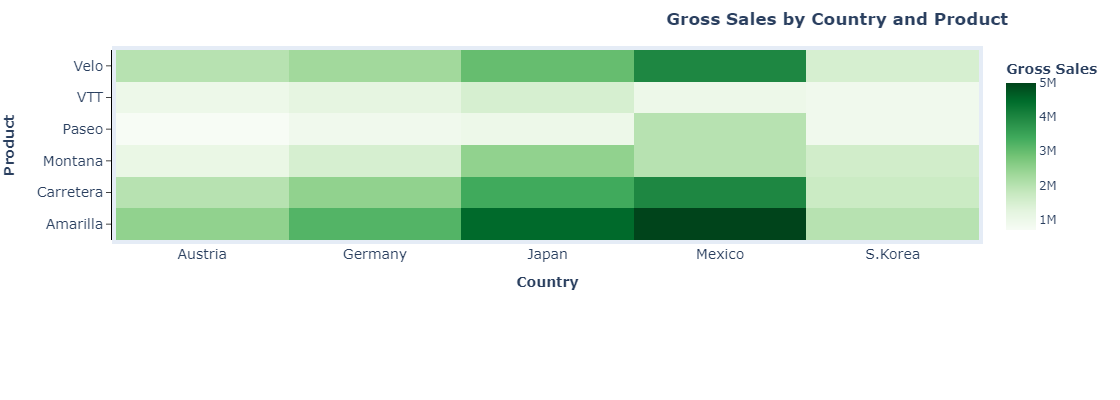

In [12]:
heat_chart = go.Figure(
            data=go.Heatmap(
                    z=new_df,
                    x=new_df.columns,
                    y=new_df.index,
                    colorscale='greens',
                    colorbar={"title": '<b>Gross Sales'}))

heat_chart.update_layout(
    title_text='<b>Gross Sales by Country and Product',
    title_x=0.9,
    xaxis=dict(
        title='<b>Country',
        titlefont_size=14,
        tickfont_size=14,
    ),
    yaxis=dict(
        title='<b>Product',
        titlefont_size=14,
        tickfont_size=14,
        ticks='outside',
        showline=True,
        linewidth=1,
        linecolor='black',
    ),
    autosize=True,
    width=650,
    height=400,
    margin=dict(
        l=50,
        r=100,
        b=160,
        t=50,
        pad=4
    )
)    

## Pie Chart

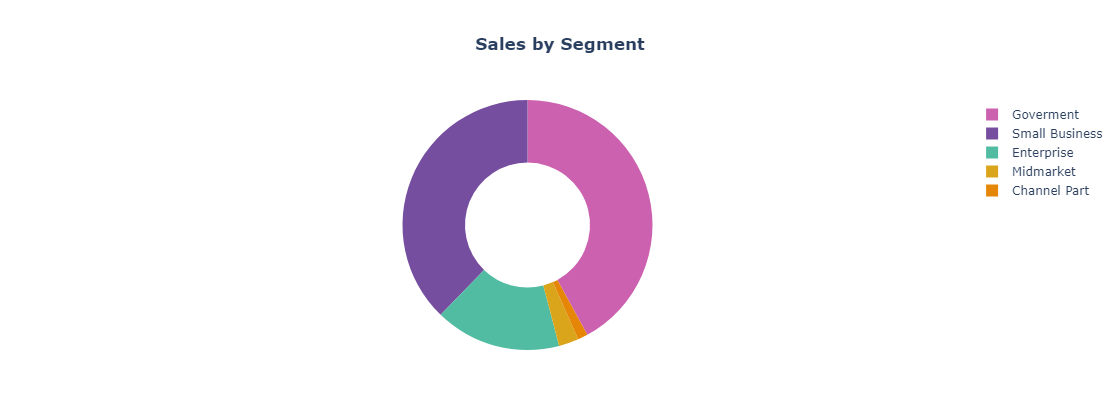

In [13]:
pie_chart = go.Figure(data=[go.Pie(labels=df.Segment, values=df.Gross_Sales_COGS, hole=0.5)])

pie_chart.update_traces(textinfo='none', marker = dict(colors=px.colors.qualitative.Vivid))
pie_chart.update_layout(
    title='<b>Sales by Segment', 
    title_x=0.5, 
    autosize=True,
    width=400, 
    height=400,
    margin=dict(
        l=100,
        r=50,
        b=50,
        t=100,
        pad=4
    )
)
pie_chart

#### Create app layout (Working)

##### List dropdown options

In [14]:
available_indicators1=["Entity1", "Entity2", "Entity3", "Entity4"]
available_indicators2=["2022","2021","2020","2019"]

##### Create dropdown object

In [27]:
nav_dropdown = html.Div([
                dbc.Row([
                    dbc.Col([
                        dcc.Dropdown(
                            id='crossfilter-xaxis-column',
                            options=[{'label': i, 'value': i} for i in available_indicators1],
                            value='Select'
                        ),],style={'display': 'inline-block',},xs=5,sm=5,md=5,lg=7,xl=7,),
                    dbc.Col([
                    dcc.Dropdown(
                        id='crossfilter-yaxis-column',
                        options=[{'label': i, 'value': i} for i in available_indicators2],
                        value='Select'
                    ),],style={'float': 'right'},xs=5,sm=5,md=5,lg=7,xl=7,),
                ],)
            ],style={}),

In [28]:
app.layout = html.Div(
    [
        dbc.Navbar(
            dbc.Container(
                [
                    html.A(
                        # Use row and col to control vertical alignment of logo / brand
                        dbc.Row(
                            [
                                dbc.Col(html.Img(src="https://pic.onlinewebfonts.com/svg/img_542879.png", height="30px")),
                                dbc.Col(dbc.NavbarBrand("Revenue & COGS by Segment", className="ms-2")),
                            ],
                            align="center",
                            className="g-0",
                        ),
                        href="https://mobile.twitter.com/ws_room/photo",
                        style={"textDecoration": "none"},
                    ),
                    dbc.NavbarToggler(id="navbar-toggler", n_clicks=0),
                    dbc.Collapse(
                        nav_dropdown,
                        id="navbar-collapse",
                        is_open=False,
                        navbar=True,
                        style={'flex-grow':0},
                    ),

                ]
            ),
            color="dark",
            dark=True,
        ),        
        
        #Charts
        dbc.Container([ 
             
            dbc.Row([
               dbc.Col([
                    dcc.Graph(
                        id='sales-cogs-by-segment',
                        figure=bar_chart),
               ],xs=12, sm=12, md=12, lg=5, xl=5),
               dbc.Col([
                    dbc.Row([
                        dbc.Col([
                            dcc.Graph(
                                id='sales-by-segment',
                                figure=pie_chart)
                        ],xs=12, sm=12, md=12, lg=6, xl=6),
                    ]),
                    dbc.Row([
                        dbc.Col([
                           dcc.Graph(
                                id='heatmap',
                                figure=heat_chart) 
                        ],xs=12, sm=12, md=12, lg=6, xl=6),
                    ]),
               ],), 
            ])
        ])           

    ]
)

# add callback for toggling the collapse on small screens

@app.callback(
    Output("navbar-collapse", "is_open"),
    [Input("navbar-toggler", "n_clicks")],
    [State("navbar-collapse", "is_open")],
)
def toggle_navbar_collapse(n, is_open):
    if n:
        return not is_open
    return is_open

## Output

### Generate URL and show logs

In [29]:
if __name__ == '__main__':
    app.run_server(proxy=f"http://127.0.0.1:{DASH_PORT}::https://app.naas.ai")

Dash is running on https://app.naas.ai/user/fcha56@gmail.com/proxy/8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050 (Press CTRL+C to quit)
127.0.0.1 - - [17/Aug/2022 12:48:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2022 12:48:17] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2022 12:48:17] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2022 12:48:18] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2022 12:48:18] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2022 12:48:18] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Aug/2022 12:48:19] "GET /_favicon.ico?v=2.6.1 HTTP/1.1" 200 -
